In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn import svm
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import time
import bovo.svm as bsvm
import scipy.stats



In [3]:
cv = KFold(n_splits=4)
svc = SVC(kernel="linear", C=1e-2, decision_function_shape='ovo')

In [4]:
def prediction_evaluation (target_name, loss_thresholds=None):

    if loss_thresholds is None:
        _, y = bsvm.load_data(target_name)
        loss_thresholds = [np.quantile(y, 1/3), np.quantile(y, 2/3)]

    X, y, columns = bsvm.load_with_thresholds(target_name, np.array(loss_thresholds))
    scores, columns_selectors = bsvm.select_features (svc, cv, X, y)
    best_variables = list(columns[columns_selectors[np.argmax(scores)]])
    print("Best variables ({}) : {}".format(len(best_variables), best_variables))

    sub_x = X.T[columns_selectors[np.argmax(scores)]].T
    texts = ["<{:.2f}".format(x) for x in loss_thresholds] + [">{:.2f}".format(loss_thresholds[-1])]
    accuracy, std = bsvm.calc_multi_confusion_matrix(svc, cv, texts, sub_x, y)
    base_accuracy = max([np.mean(y==i) for i in range(len(loss_thresholds)+1)])
    plt.title("Confusion Matrix for {} | Base accuracy = {:.2f} | Actual accuracy = {:.2f}(±{:.4f})".format(target_name, base_accuracy, accuracy, std))

    plt.show()


Best variables (6) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8']


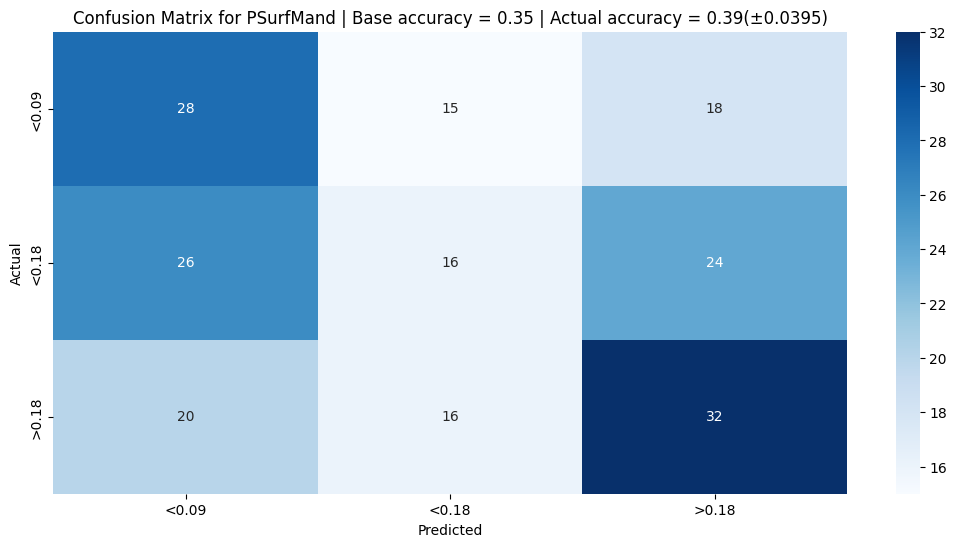

Best variables (3) : ['Airesecteur3', 'Airesecteur5', 'Airesecteur6']


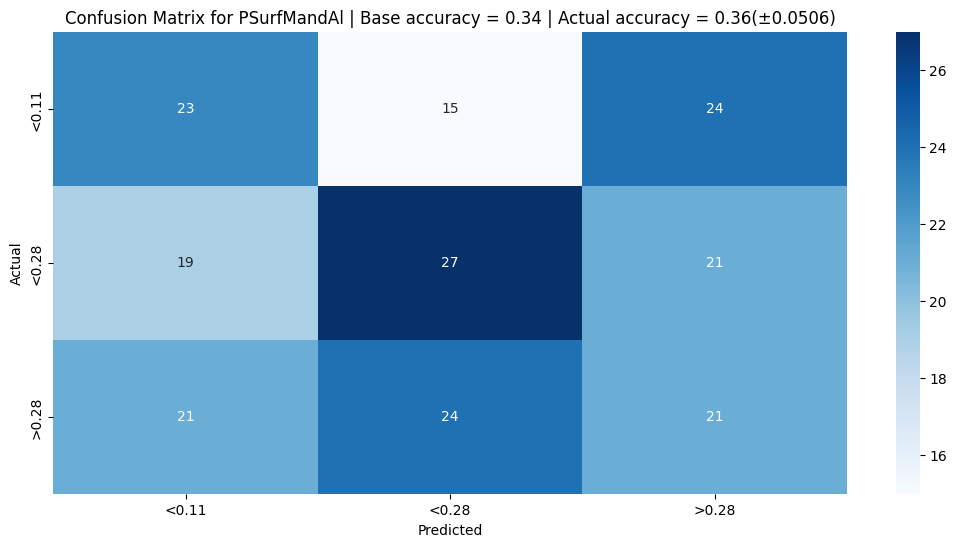

Best variables (9) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC']


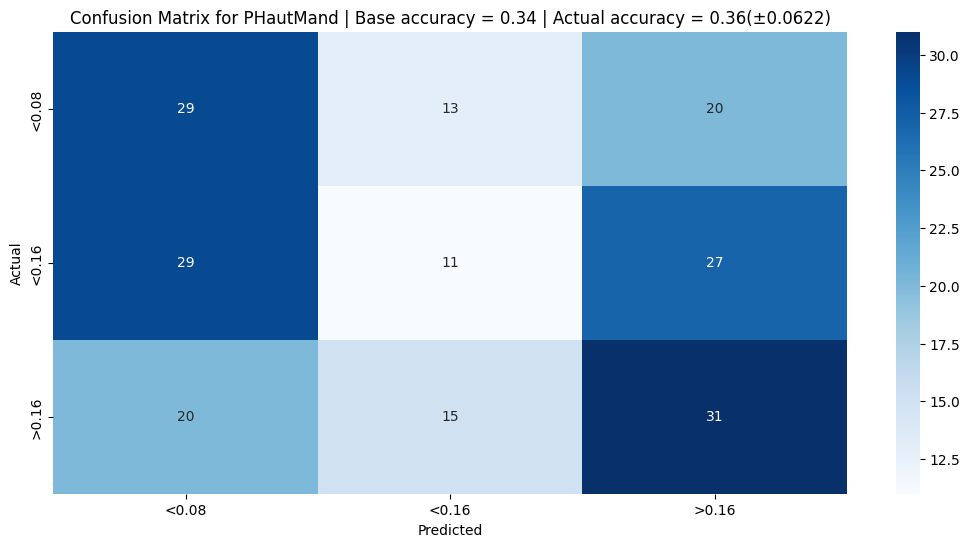

Best variables (8) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8']


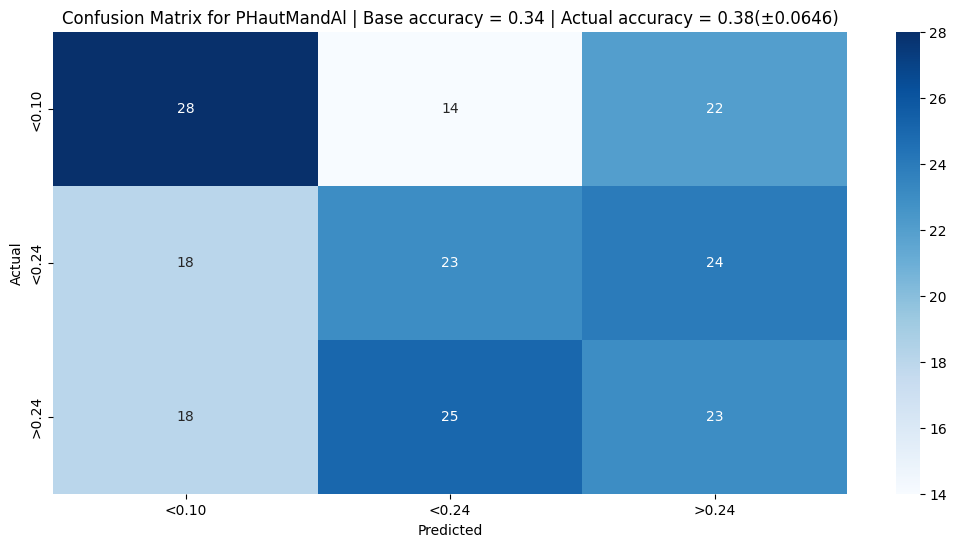

Best variables (25) : ['Airesecteur1', 'Airesecteur2', 'Airesecteur3', 'Airesecteur4', 'Airesecteur5', 'Airesecteur6', 'Airesecteur7', 'Airesecteur8', 'SEpCo25', 'SEpCo50', 'SEpCo75', 'SEpCoM', 'SEpCo2mmC', 'SEpTr25', 'SEpTr75', 'SEpTrM', 'MB', 'SLaTaOs2mmC', 'SLaTaOs25', 'SLaTaOs50', 'SLaTaOs75', 'SLaTaOsTangM', 'SPeBaTr', 'SPeToTr', 'SPeToTrAl']


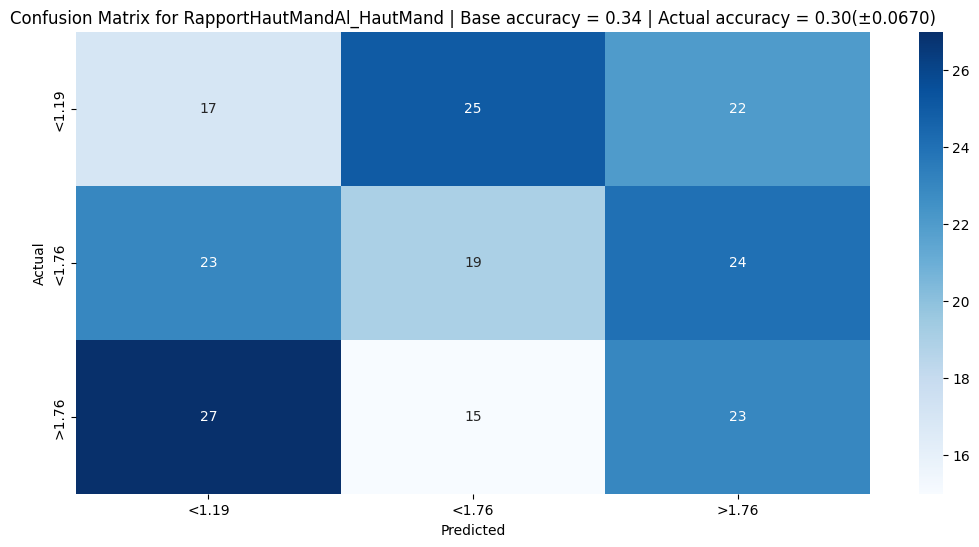

In [5]:
prediction_evaluation ("PSurfMand")
prediction_evaluation ("PSurfMandAl")
prediction_evaluation ("PHautMand")
prediction_evaluation ("PHautMandAl")
prediction_evaluation ("RapportHautMandAl_HautMand")
